In [1]:
from typing import List

import pandas as pd
from pandas import DataFrame

RANDOM_STATE = 111

dataframe = pd.read_csv("data.csv", header=0)
dataframe.loc[dataframe["y"] < 50, "y"] = 1
dataframe.loc[dataframe["y"] >= 50, "y"] = 0

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def get_keys(df: DataFrame) -> List[str]:
    result = []

    for col in df.columns:
        result.append(col)

    result.remove("y")
    return result


def get_train_val(x_data, y_data):
    return train_test_split(x_data, y_data, test_size=0.2, random_state=111, stratify=y_data)


def get_train_val_split(x_data, y_data):
    return train_test_split(x_data, y_data, test_size=0.25, random_state=111, stratify=y_data)


keys = get_keys(dataframe)

X_all = dataframe[keys]
y_all = dataframe["y"]

X_train, X_test, y_train, y_test = get_train_val(X_all, y_all)
X_train, X_val, y_train, y_val = get_train_val_split(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_all = scaler.transform(X_all)

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def plot_dataset(x_data, y_data):
    pca = PCA(n_components=3, random_state=111)
    all_pca = pca.fit_transform(x_data)
    all_label = y_data
    colors = []

    for label in all_label:
        if label == 1:
            colors.append("red")
        else:
            colors.append("blue")

    x_plt = []
    y_plt = []
    z_plt = []

    for unit in all_pca:
        x_plt.append(unit[0])
        y_plt.append(unit[1])
        z_plt.append(unit[2])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlabel("X axis label")
    ax.set_ylabel("Y axis label")
    ax.set_zlabel("Z axis label")
    ax.scatter(x_plt, y_plt, z_plt, c=colors)

    plt.gca().view_init(40, -40)
    plt.show()

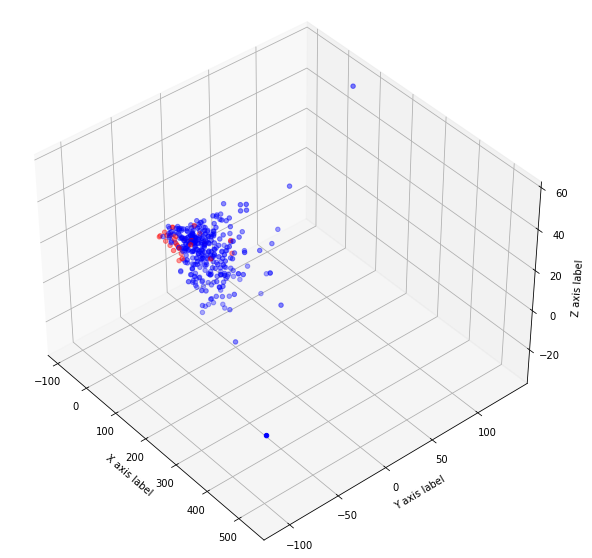

In [4]:
plot_dataset(dataframe[keys], dataframe["y"])

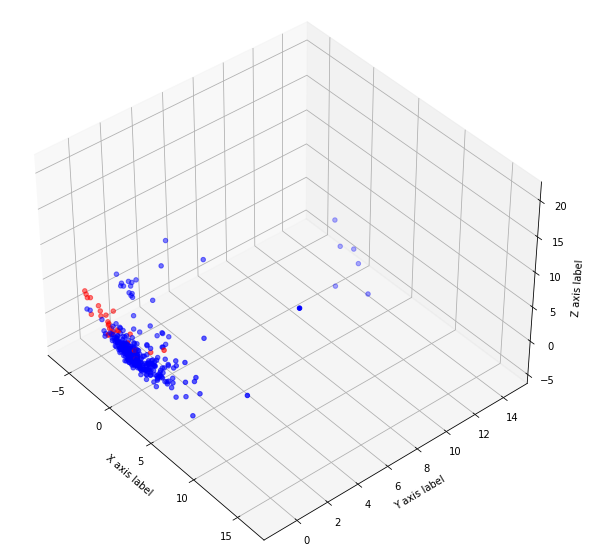

In [5]:
plot_dataset(X_all, y_all)

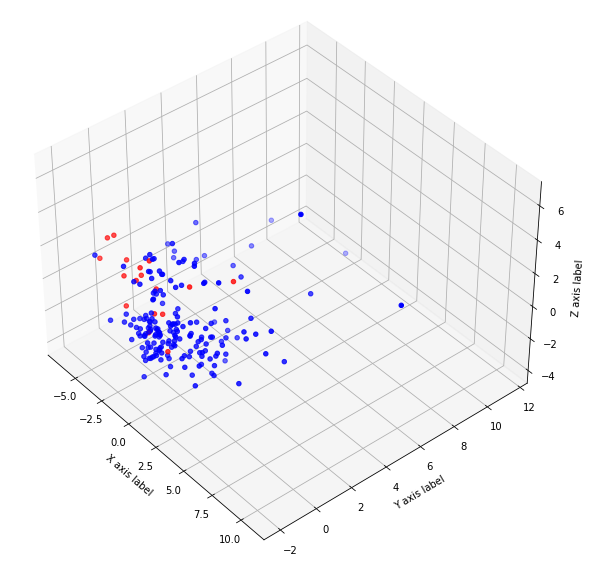

In [6]:
plot_dataset(X_train, y_train)